### import 

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50

import keras
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from glob import glob
import seaborn as sns
import datetime

print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


### uploading files

In [3]:
train_dir=(r'C:\Users\vladi\Desktop\chernet\chest_xray\train')
val_dir=(r'C:\Users\vladi\Desktop\chernet\chest_xray\val')
test_dir=(r'C:\Users\vladi\Desktop\chernet\chest_xray\test')

train_normal_dir=(r'C:\Users\vladi\Desktop\chernet\chest_xray\train\NORMAL')
train_pneumonia_dir=(r'C:\Users\vladi\Desktop\chernet\chest_xray\train\PNEUMONIA')
val_normal_dir=(r'C:\Users\vladi\Desktop\chernet\chest_xray\val\NORMAL')
val_pneumonia_dir=(r'C:\Users\vladi\Desktop\chernet\chest_xray\val\PNEUMONIA')


### Division into variables, normalization, definition of values ​​for model creation

In [4]:
image_size=(180, 180)

seed = np.random.randint(50, dtype=int)

# these are all default input values from documentation
training_datagen1 = tf.keras.utils.image_dataset_from_directory(
    train_dir, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=image_size,
    shuffle=True, seed=seed, validation_split=0.20, subset='training',
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False
)

validation_datagen1 = tf.keras.utils.image_dataset_from_directory(
    train_dir, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=image_size, 
    shuffle=True, seed=seed, validation_split=0.20, subset='validation',
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False
)

# these are all default input values from documentation
test_datagen1 = tf.keras.utils.image_dataset_from_directory(
    test_dir, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=image_size,
    shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False

    
)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Found 5216 files belonging to 2 classes.
Using 1043 files for validation.
Found 624 files belonging to 2 classes.


In [5]:
pretrained_model1 = ResNet50(weights= 'imagenet', include_top=False, input_shape= (180,180,3))

for layers in pretrained_model1.layers:
    layers.trainable = False   

In [6]:
last_layer=pretrained_model1.get_layer('conv5_block3_1_relu')
last_output = last_layer.output

x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(2,activation='sigmoid')(x)

model1=tf.keras.Model(pretrained_model1.input,x)

model1.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])

model1.summary()
print ("The num of our layers in the model is:",len(model1.layers))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']         

C:\Users\vladi\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
from keras.callbacks import LearningRateScheduler
def ir_scheduler(epoch, lr):
   decay_rate=0.8
   decay_step=1
   if epoch % decay_step == 0 and epoch:
        return lr * pow(decay_rate,np.floor(epoch / decay_step))
   return lr 

In [8]:
epochs=20
learning_rate=LearningRateScheduler(ir_scheduler,verbose=1)
Stop_befor=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
call_Back=[learning_rate,Stop_befor]



In [9]:
history1=model1.fit(training_datagen1,validation_data=validation_datagen1,epochs=epochs, callbacks=call_Back, verbose=2)


Epoch 00001: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/20
131/131 - 213s - loss: 0.1775 - accuracy: 0.9272 - precision: 0.9236 - recall: 0.9298 - val_loss: 0.0702 - val_accuracy: 0.9808 - val_precision: 0.9789 - val_recall: 0.9799 - lr: 1.0000e-04 - 213s/epoch - 2s/step

Epoch 00002: LearningRateScheduler setting learning rate to 7.999999797903001e-05.
Epoch 2/20
131/131 - 206s - loss: 0.0609 - accuracy: 0.9806 - precision: 0.9796 - recall: 0.9794 - val_loss: 0.0640 - val_accuracy: 0.9827 - val_precision: 0.9837 - val_recall: 0.9808 - lr: 8.0000e-05 - 206s/epoch - 2s/step

Epoch 00003: LearningRateScheduler setting learning rate to 5.119999870657922e-05.
Epoch 3/20
131/131 - 202s - loss: 0.0377 - accuracy: 0.9890 - precision: 0.9897 - recall: 0.9887 - val_loss: 0.0543 - val_accuracy: 0.9827 - val_precision: 0.9828 - val_recall: 0.9837 - lr: 5.1200e-05 - 202s/epoch - 2s/step

Epoch 00004: LearningRateScheduler setting learning rate to 2.6214398443698

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'lr'])


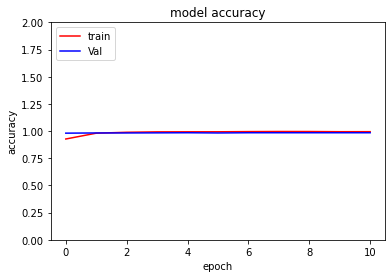

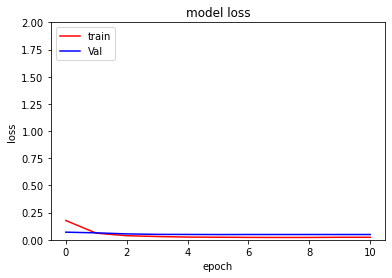

In [10]:
print(history1.history.keys())
plt.plot(history1.history['accuracy'],'r')
plt.plot(history1.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,2)

plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()
plt.plot(history1.history['loss'],'r')
plt.plot(history1.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()




In [11]:
# Get predictions and Original labels
import numpy as np 
predictions = np.array([])
test_labels =  np.array([])
for x, y in test_datagen1:
    predictions = np.concatenate([predictions, np.argmax(model1.predict(x), axis = -1)])
    test_labels = np.concatenate([test_labels, np.argmax(y.numpy(), axis=-1)])

print(test_labels.shape)
print(predictions.shape)


(624,)
(624,)


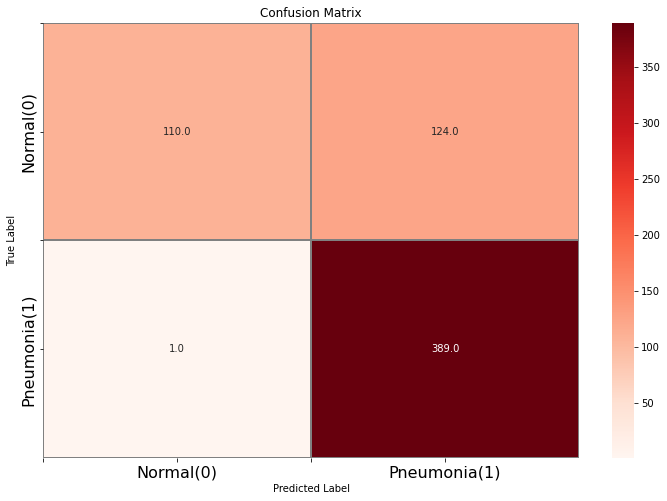

In [12]:
# Get the confusion matrix
cm  = confusion_matrix(test_labels, predictions)
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cm, annot=True, linewidths=0.01, cmap=plt.cm.Reds, linecolor="gray", fmt='.1f', ax=ax)
plt.xticks(np.arange(0, 2, step=0.5), ['', 'Normal(0)', '', 'Pneumonia(1)'], fontsize=16)
plt.yticks(np.arange(0, 2, step=0.5), ['', 'Normal(0)', '', 'Pneumonia(1)'], fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [13]:
recall = sklearn.metrics.recall_score(test_labels, predictions, pos_label=1)
print(" The recall of model is:" ,recall)
#Recall = TruePositives / (TruePositives + FalseNegatives)

precision = sklearn.metrics.precision_score(test_labels, predictions, pos_label=1)
print("The precision of the model is:" ,precision)
#precision = TruePositives/(TruePositives+FalsePositives)

 The recall of model is: 0.9974358974358974
The precision of the model is: 0.7582846003898636


## Model 2

In [14]:
model_2 = ResNet50(weights= 'imagenet', include_top=False, input_shape= (180,180,3))


for layers in model_2.layers:
    layers.trainable = False

i = 1
for layer in model_2.layers:
  if i==int(i/87):
    layer.trainable = True
  i+=1


In [15]:
Mid_layer=model_2.get_layer('conv5_block3_1_relu')
Mid_output = Mid_layer.output

x=tf.keras.layers.Flatten()(Mid_output)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(2,activation='sigmoid')(x)

model2=tf.keras.Model(model_2.input,x)

model2.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])
# model2.summary()

C:\Users\vladi\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:
history2=model2.fit(training_datagen1,validation_data=validation_datagen1,epochs=epochs, callbacks=call_Back, verbose=2)


Epoch 00001: LearningRateScheduler setting learning rate to 2.097151991620194e-05.
Epoch 1/20
131/131 - 199s - loss: 0.0285 - accuracy: 0.9928 - precision: 0.9923 - recall: 0.9931 - val_loss: 0.0524 - val_accuracy: 0.9847 - val_precision: 0.9828 - val_recall: 0.9847 - lr: 2.0972e-05 - 199s/epoch - 2s/step

Epoch 00002: LearningRateScheduler setting learning rate to 1.6777215932961553e-05.
Epoch 2/20
131/131 - 199s - loss: 0.0238 - accuracy: 0.9942 - precision: 0.9938 - recall: 0.9940 - val_loss: 0.0481 - val_accuracy: 0.9837 - val_precision: 0.9828 - val_recall: 0.9856 - lr: 1.6777e-05 - 199s/epoch - 2s/step

Epoch 00003: LearningRateScheduler setting learning rate to 1.0737418197095396e-05.
Epoch 3/20
131/131 - 199s - loss: 0.0218 - accuracy: 0.9959 - precision: 0.9947 - recall: 0.9952 - val_loss: 0.0471 - val_accuracy: 0.9856 - val_precision: 0.9828 - val_recall: 0.9866 - lr: 1.0737e-05 - 199s/epoch - 2s/step

Epoch 00004: LearningRateScheduler setting learning rate to 5.49755804240

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'lr'])


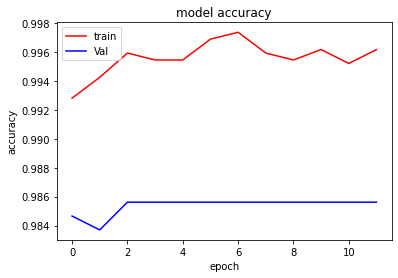

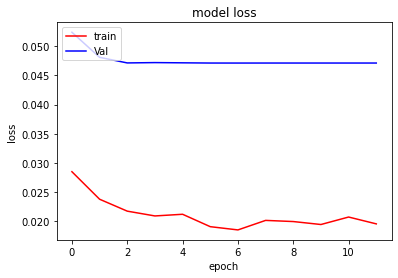

In [20]:
print(history2.history.keys())
plt.plot(history2.history['accuracy'],'r')
plt.plot(history2.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
#plt.ylim(0,2)

plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()
plt.plot(history2.history['loss'],'r')
plt.plot(history2.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
#plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()

(624,)
(624,)


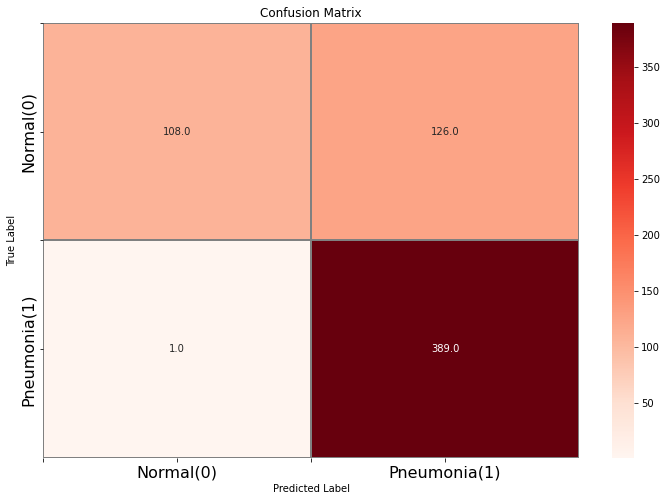

In [21]:
# Get predictions and Original labels
import numpy as np 
predictions = np.array([])
test_labels =  np.array([])
for x, y in test_datagen1:
    predictions = np.concatenate([predictions, np.argmax(model2.predict(x), axis = -1)])
    test_labels = np.concatenate([test_labels, np.argmax(y.numpy(), axis=-1)])

print(test_labels.shape)
print(predictions.shape)


# Get the confusion matrix
cm  = confusion_matrix(test_labels, predictions)
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cm, annot=True, linewidths=0.01, cmap=plt.cm.Reds, linecolor="gray", fmt='.1f', ax=ax)
plt.xticks(np.arange(0, 2, step=0.5), ['', 'Normal(0)', '', 'Pneumonia(1)'], fontsize=16)
plt.yticks(np.arange(0, 2, step=0.5), ['', 'Normal(0)', '', 'Pneumonia(1)'], fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



In [22]:
recall = sklearn.metrics.recall_score(test_labels, predictions, pos_label=1)
print(" The recall of model is:" ,recall)
#Recall = TruePositives / (TruePositives + FalseNegatives)

precision = sklearn.metrics.precision_score(test_labels, predictions, pos_label=1)
print("The precision of the model is:" ,precision)
#precision = TruePositives/(TruePositives+FalsePositives)

 The recall of model is: 0.9974358974358974
The precision of the model is: 0.7553398058252427


## Model 3 

In [23]:
model_3 = ResNet50(weights= 'imagenet', include_top=False, input_shape= (180,180,3))


for layers in model_3.layers:
    layers.trainable = False

i = 1
for layer in model_3.layers:
  if i==int(i/174): 
    layer.trainable = True
  i+=1

In [24]:
last_layer=model_3.get_layer('conv5_block3_1_relu')
last_output = last_layer.output

x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(2,activation='sigmoid')(x)

model3=tf.keras.Model(model_3.input,x)

model3.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])

C:\Users\vladi\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
history3=model3.fit(training_datagen1,validation_data=validation_datagen1,epochs=epochs, callbacks=call_Back, verbose=2)


Epoch 00001: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/20
131/131 - 211s - loss: 0.1972 - accuracy: 0.9236 - precision: 0.9126 - recall: 0.9310 - val_loss: 0.0766 - val_accuracy: 0.9751 - val_precision: 0.9759 - val_recall: 0.9722 - lr: 1.0000e-04 - 211s/epoch - 2s/step

Epoch 00002: LearningRateScheduler setting learning rate to 7.999999797903001e-05.
Epoch 2/20
131/131 - 164s - loss: 0.0674 - accuracy: 0.9782 - precision: 0.9780 - recall: 0.9782 - val_loss: 0.0575 - val_accuracy: 0.9808 - val_precision: 0.9827 - val_recall: 0.9799 - lr: 8.0000e-05 - 164s/epoch - 1s/step

Epoch 00003: LearningRateScheduler setting learning rate to 5.119999870657922e-05.
Epoch 3/20
131/131 - 158s - loss: 0.0471 - accuracy: 0.9868 - precision: 0.9852 - recall: 0.9861 - val_loss: 0.0517 - val_accuracy: 0.9808 - val_precision: 0.9875 - val_recall: 0.9808 - lr: 5.1200e-05 - 158s/epoch - 1s/step

Epoch 00004: LearningRateScheduler setting learning rate to 2.6214398443698

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'lr'])


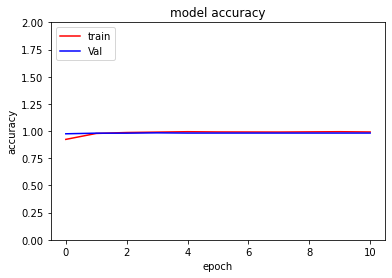

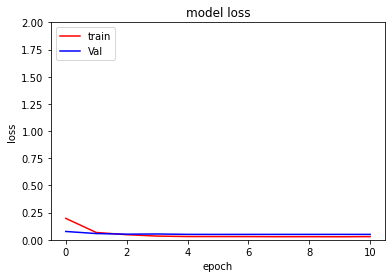

In [26]:
print(history3.history.keys())
plt.plot(history3.history['accuracy'],'r')
plt.plot(history3.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,2)

plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()
# summarize history for loss
plt.plot(history3.history['loss'],'r')
plt.plot(history3.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()

(624,)
(624,)


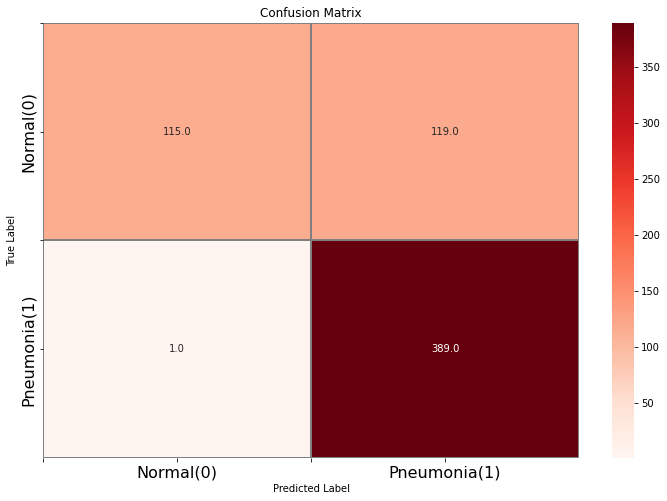

In [27]:
# Get predictions and Original labels
import numpy as np 
predictions = np.array([])
test_labels =  np.array([])
for x, y in test_datagen1:
    predictions = np.concatenate([predictions, np.argmax(model3.predict(x), axis = -1)])
    test_labels = np.concatenate([test_labels, np.argmax(y.numpy(), axis=-1)])

print(test_labels.shape)
print(predictions.shape)


# Get the confusion matrix
cm  = confusion_matrix(test_labels, predictions)
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cm, annot=True, linewidths=0.01, cmap=plt.cm.Reds, linecolor="gray", fmt='.1f', ax=ax)
plt.xticks(np.arange(0, 2, step=0.5), ['', 'Normal(0)', '', 'Pneumonia(1)'], fontsize=16)
plt.yticks(np.arange(0, 2, step=0.5), ['', 'Normal(0)', '', 'Pneumonia(1)'], fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



In [29]:
recall = sklearn.metrics.recall_score(test_labels, predictions, pos_label=1)
print(" The recall of model is:" ,recall)
#Recall = TruePositives / (TruePositives + FalseNegatives)

precision = sklearn.metrics.precision_score(test_labels, predictions, pos_label=1)
print("The precision of the model is:" ,precision)
#precision = TruePositives/(TruePositives+FalsePositives)

 The recall of model is: 0.9974358974358974
The precision of the model is: 0.765748031496063


## model  4 

In [30]:
model_4 = ResNet50(weights= 'imagenet', include_top=False, input_shape= (180,180,3))

for layers in model_4.layers:
    layers.trainable = False

for layer in model_4.layers:
  if i==int(i/87):
    layer.trainable = True
  i+=1

In [31]:
last_layer=model_4.get_layer('conv5_block3_1_relu')
last_output = last_layer.output

x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(2,activation='sigmoid')(x)

model4=tf.keras.Model(model_4.input,x)

model4.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])

C:\Users\vladi\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
class_weight = {0: 0.75,
                1: 0.25}

history4=model4.fit(training_datagen1,validation_data=validation_datagen1,epochs=epochs, callbacks=call_Back, verbose=2,class_weight=class_weight)


Epoch 00001: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/20
131/131 - 218s - loss: 0.0817 - accuracy: 0.9307 - precision: 0.9191 - recall: 0.9260 - val_loss: 0.0750 - val_accuracy: 0.9741 - val_precision: 0.9722 - val_recall: 0.9732 - lr: 1.0000e-04 - 218s/epoch - 2s/step

Epoch 00002: LearningRateScheduler setting learning rate to 7.999999797903001e-05.
Epoch 2/20
131/131 - 213s - loss: 0.0290 - accuracy: 0.9736 - precision: 0.9727 - recall: 0.9727 - val_loss: 0.0659 - val_accuracy: 0.9732 - val_precision: 0.9732 - val_recall: 0.9732 - lr: 8.0000e-05 - 213s/epoch - 2s/step

Epoch 00003: LearningRateScheduler setting learning rate to 5.119999870657922e-05.
Epoch 3/20
131/131 - 188s - loss: 0.0190 - accuracy: 0.9827 - precision: 0.9832 - recall: 0.9820 - val_loss: 0.0537 - val_accuracy: 0.9818 - val_precision: 0.9827 - val_recall: 0.9818 - lr: 5.1200e-05 - 188s/epoch - 1s/step

Epoch 00004: LearningRateScheduler setting learning rate to 2.6214398443698

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'lr'])


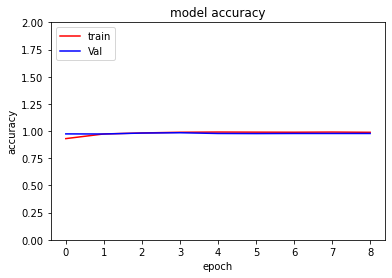

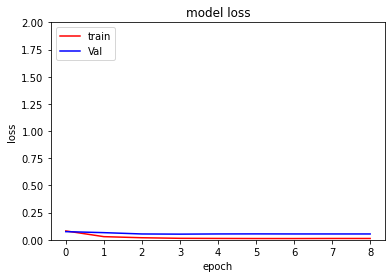

In [33]:
print(history4.history.keys())
plt.plot(history4.history['accuracy'],'r')
plt.plot(history4.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,2)

plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()
# summarize history for loss
plt.plot(history4.history['loss'],'r')
plt.plot(history4.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()

(624,)
(624,)


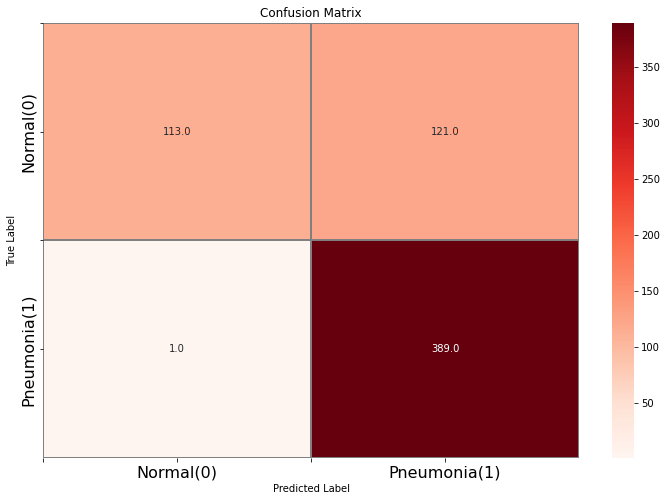

In [34]:
# Get predictions and Original labels
import numpy as np 
predictions = np.array([])
test_labels =  np.array([])
for x, y in test_datagen1:
    predictions = np.concatenate([predictions, np.argmax(model4.predict(x), axis = -1)])
    test_labels = np.concatenate([test_labels, np.argmax(y.numpy(), axis=-1)])

print(test_labels.shape)
print(predictions.shape)


# Get the confusion matrix
cm  = confusion_matrix(test_labels, predictions)
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cm, annot=True, linewidths=0.01, cmap=plt.cm.Reds, linecolor="gray", fmt='.1f', ax=ax)
plt.xticks(np.arange(0, 2, step=0.5), ['', 'Normal(0)', '', 'Pneumonia(1)'], fontsize=16)
plt.yticks(np.arange(0, 2, step=0.5), ['', 'Normal(0)', '', 'Pneumonia(1)'], fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



In [35]:
recall = sklearn.metrics.recall_score(test_labels, predictions, pos_label=1)
print(" The recall of model is:" ,recall)
#Recall = TruePositives / (TruePositives + FalseNegatives)

precision = sklearn.metrics.precision_score(test_labels, predictions, pos_label=1)
print("The precision of the model is:" ,precision)
#precision = TruePositives/(TruePositives+FalsePositives)

 The recall of model is: 0.9974358974358974
The precision of the model is: 0.7627450980392156


## Model 5

In [36]:
model_5 = ResNet50(weights= 'imagenet', include_top=False, input_shape= (180,180,3))

for layers in model_5.layers:
    layers.trainable = False


i = 1
for layer in model_5.layers:
  if i==int(i/87):
    layer.trainable = True
  i+=1

In [37]:
last_layer=model_5.get_layer('conv5_block3_1_relu')
last_output = last_layer.output

x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(2,activation='sigmoid')(x)

model5=tf.keras.Model(model_5.input,x)

model5.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])

C:\Users\vladi\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [38]:
class_weight = {0: 0.25,
                1: 0.75}

history5=model5.fit(training_datagen1,validation_data=validation_datagen1,epochs=epochs, callbacks=call_Back, verbose=2,class_weight=class_weight)


Epoch 00001: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/20
131/131 - 178s - loss: 0.1249 - accuracy: 0.8543 - precision: 0.8486 - recall: 0.8517 - val_loss: 0.1455 - val_accuracy: 0.9396 - val_precision: 0.9415 - val_recall: 0.9406 - lr: 1.0000e-04 - 178s/epoch - 1s/step

Epoch 00002: LearningRateScheduler setting learning rate to 7.999999797903001e-05.
Epoch 2/20
131/131 - 165s - loss: 0.0395 - accuracy: 0.9648 - precision: 0.9626 - recall: 0.9612 - val_loss: 0.0888 - val_accuracy: 0.9732 - val_precision: 0.9732 - val_recall: 0.9741 - lr: 8.0000e-05 - 165s/epoch - 1s/step

Epoch 00003: LearningRateScheduler setting learning rate to 5.119999870657922e-05.
Epoch 3/20
131/131 - 161s - loss: 0.0287 - accuracy: 0.9753 - precision: 0.9744 - recall: 0.9744 - val_loss: 0.0820 - val_accuracy: 0.9760 - val_precision: 0.9741 - val_recall: 0.9732 - lr: 5.1200e-05 - 161s/epoch - 1s/step

Epoch 00004: LearningRateScheduler setting learning rate to 2.6214398443698

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'lr'])


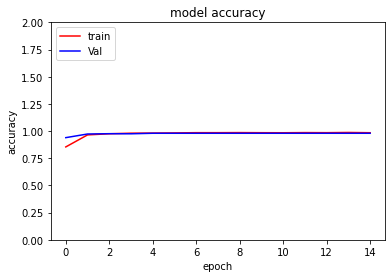

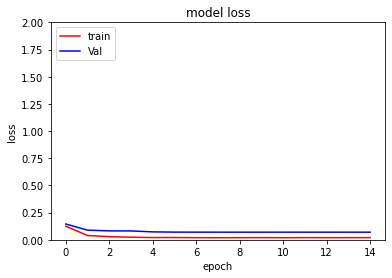

In [39]:
print(history5.history.keys())
plt.plot(history5.history['accuracy'],'r')
plt.plot(history5.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,2)

plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()
# summarize history for loss
plt.plot(history5.history['loss'],'r')
plt.plot(history5.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()

(624,)
(624,)


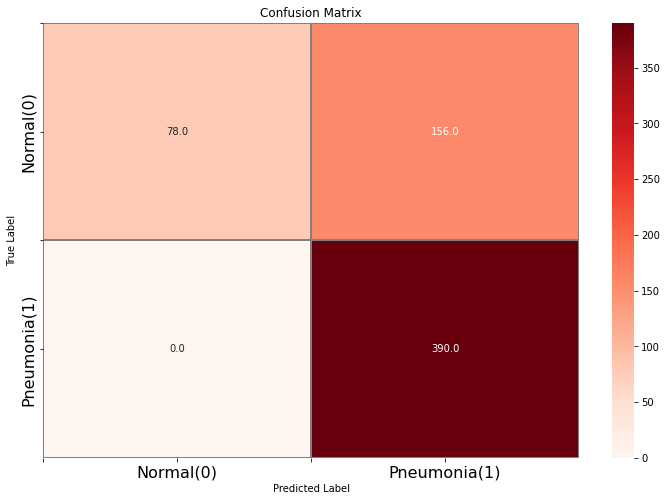

In [42]:
# Get predictions and Original labels
import numpy as np 
predictions = np.array([])
test_labels =  np.array([])
for x, y in test_datagen1:
    predictions = np.concatenate([predictions, np.argmax(model5.predict(x), axis = -1)])
    test_labels = np.concatenate([test_labels, np.argmax(y.numpy(), axis=-1)])

print(test_labels.shape)
print(predictions.shape)


# Get the confusion matrix
cm  = confusion_matrix(test_labels, predictions)
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cm, annot=True, linewidths=0.01, cmap=plt.cm.Reds, linecolor="gray", fmt='.1f', ax=ax)
plt.xticks(np.arange(0, 2, step=0.5), ['', 'Normal(0)', '', 'Pneumonia(1)'], fontsize=16)
plt.yticks(np.arange(0, 2, step=0.5), ['', 'Normal(0)', '', 'Pneumonia(1)'], fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



In [41]:
recall = sklearn.metrics.recall_score(test_labels, predictions, pos_label=1)
print(" The recall of model is:" ,recall)
#Recall = TruePositives / (TruePositives + FalseNegatives)

precision = sklearn.metrics.precision_score(test_labels, predictions, pos_label=1)
print("The precision of the model is:" ,precision)
#precision = TruePositives/(TruePositives+FalsePositives)

 The recall of model is: 1.0
The precision of the model is: 0.7142857142857143
